# Naive Bayes

Implementasi algoritma Naive Bayes menggunakan modul scikit-learn.

## 1. Categorical Naive Bayes

Categorical Naive Bayes digunakan pada fitur/atribut dengan tipe data kategori.

### Contoh 1.1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Buat dataset dengan tipe data numerik tetapi terdistribusi secara kategorikal, data disimpan di objek **`X`** sedangkan label data disimpan di objek **`y`**.

In [2]:
random_generator = np.random.RandomState(1)
X = random_generator.randint(10, size=(3, 10))
y = np.array([1, 2, 3])

In [3]:
# Isi dari objek X
X

array([[5, 8, 9, 5, 0, 0, 1, 7, 6, 9],
       [2, 4, 5, 2, 4, 2, 4, 7, 7, 9],
       [1, 7, 0, 6, 9, 9, 7, 6, 9, 1]])

Naive Bayes untuk data kategorikal diimplementasikan pada kelas **`CategoricalNB`** pada modul **`sklearn.naive_bayes`**. Kemudian langkah berikutnya adalah memanggil method **`fit()`** dengan parameter objek **`X`** berdasarkan label **`y`**.

In [4]:
from sklearn.naive_bayes import CategoricalNB

nb_classifier = CategoricalNB()
nb_classifier.fit(X, y)

CategoricalNB()

Sekarang kita akan mencoba prediksi data yang berada di dataset **`X`**, yaitu `[[5 8 9 5 0 0 1 7 6 9]]`.

In [5]:
print('Data prediksi: {}'.format(X[0:1]))
print('Kelas Prediksi: {}'.format(nb_classifier.predict(X[0:1])))

Data prediksi: [[5 8 9 5 0 0 1 7 6 9]]
Kelas Prediksi: [1]


Sekarang kita akan memprediksi data baru pada objek **`test`**, kemudian kita juga akan melihat berapa probabilitas dari setiap prediksi kelas yang dilakukan.

In [6]:
test = [[5, 0, 3, 4, 0, 0, 7, 7, 6, 9]]
print('Kelas Prediksi: {}'.format(nb_classifier.predict(test)))
print('Probability setiap kelas: {}'.format(nb_classifier.predict_proba(test)))

Kelas Prediksi: [1]
Probability setiap kelas: [[0.91428571 0.05714286 0.02857143]]


### Contoh 1.2

Di bagian ini kita akan mencoba mengimplementasikan Naive Bayes berdasarkan catatan pada **Class Notebook** di Microsoft Teams masing-masing. Terdapat dua atribut yaitu **`weather`** dan **`temp`**, dengan label/kelas **`play`**.

In [7]:
weather = np.array(['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 
                    'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'])
temp = np.array(['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 
                 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'])
play = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 
                 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])

Sebelum kita menggunakan dataset tersebut, kita perlu memerlukan beberapa langkah preprocessing sebelumnya.

#### Preprocessing

1. Kita akan menggabungkan dataset pada objek weather, temp, dan play ke dalam satu array dengan bantuan numpy.array

In [8]:
data = np.array([weather, temp, play])
print(data)
print('\nDimensi data: {}'.format(data.shape))

[['Sunny' 'Sunny' 'Overcast' 'Rainy' 'Rainy' 'Rainy' 'Overcast' 'Sunny'
  'Sunny' 'Rainy' 'Sunny' 'Overcast' 'Overcast' 'Rainy']
 ['Hot' 'Hot' 'Hot' 'Mild' 'Cool' 'Cool' 'Cool' 'Mild' 'Cool' 'Mild'
  'Mild' 'Mild' 'Hot' 'Mild']
 ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'No']]

Dimensi data: (3, 14)


2. Terlihat bahwa dimensi data tersebut adalah (3 x 14) yaitu, 3 baris dan 14 kolom. Sedangkan dataset yang kita perlukan adalah dengan dimensi (14 x 3), 14 baris dan 3 kolom. Oleh karena itu, kita harus mengubah dimensi dataset kita dengan metode matriks transpose.

    Matriks transpose dapat diimplementasikan dengan method `numpy.transpose()`.

In [9]:
data = np.transpose(data)
print(data)
print('\nDimensi data: {}'.format(data.shape))

[['Sunny' 'Hot' 'No']
 ['Sunny' 'Hot' 'No']
 ['Overcast' 'Hot' 'Yes']
 ['Rainy' 'Mild' 'Yes']
 ['Rainy' 'Cool' 'Yes']
 ['Rainy' 'Cool' 'No']
 ['Overcast' 'Cool' 'Yes']
 ['Sunny' 'Mild' 'No']
 ['Sunny' 'Cool' 'Yes']
 ['Rainy' 'Mild' 'Yes']
 ['Sunny' 'Mild' 'Yes']
 ['Overcast' 'Mild' 'Yes']
 ['Overcast' 'Hot' 'Yes']
 ['Rainy' 'Mild' 'No']]

Dimensi data: (14, 3)


3. Mengubah struktur data array multi-dimensi menjadi DataFrame dengan pandas

In [10]:
import pandas as pd
df = pd.DataFrame(data=data, columns=['weather', 'temp', 'play'])
df.head()

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


4. Encoding
    Metode classifier tidak dapat memproses segala bentuk data dengan tipe non-numerik, sehingga kita perlu mengubah data kategorikal kita menjadi data dengan tipe data numerik sehingga classifier dapat memahami data tersebut. Teknik yang digunakan untuk melakukan ini adalah Encoding. Encoding dapat kita implementasikan dengan kelas `LabelEncoder` pada modul `sklear.preprocessing`.
    
    Supaya hasilnya terlihat maka kita akan tampung hasil encoding-nya ke dalam atribut baru yaitu `enc_weather`, `enc_temp`, dan `enc_play`.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['enc_weather'] = label_encoder.fit_transform(df['weather'])
df['enc_temp'] = label_encoder.fit_transform(df['temp'])
df['enc_play'] = label_encoder.fit_transform(df['play'])

df.head(10)

,weather,temp,play,enc_weather,enc_temp,enc_play
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


Setelah preprocessing selesai maka kita bisa langsung memasukkan data yang telah di-encode ke dalam classifier.

In [12]:
nb_classifier = CategoricalNB()
nb_classifier.fit(df[['enc_weather', 'enc_temp']], np.ravel(df[['enc_play']]))

test = [[0, 2]] # 0:Overcast, 2:Mild
print('Kelas Prediksi: {}'.format(nb_classifier.predict(test))) 
print('Probabilitas setiap kelas: {}'.format(nb_classifier.predict_proba(test)))

Kelas Prediksi: [1]
Probabilitas setiap kelas: [[0.13043478 0.86956522]]


## 2. Gaussian Naive Bayes

Gaussian Naive Bayes sangat cocok digunakan jika data digunakan adalah data numerik (kontinyu).

### Contoh 2.1

Pada bagian ini kita akan mencoba men-generate dataset dengan tipe data kontinyu dengan menggunakan kelas `make_blobs` pada modul `sklearn.datasets`.

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

Visualisasikan dengan scatter plot.

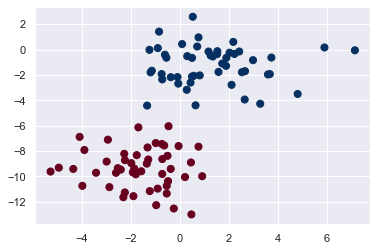

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Terlihat pada plot di atas, terdapat titik dengan warna merah dan biru. Warna titik tersebut menggambarkan jumlah label/kelas yang terdapat pada dataset tersebut.




Mengimplementasikan Gaussian Naive Bayes dengan memanggil kelas `GaussianNB`.

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

# Fit data ke dalam classifier
nb_model.fit(X, y);

Buat data baru sebagai data test menggunakan numpy random generator (`np.random.RandomState()`), kemudian prediksi data tersebut ke dalam label.

In [16]:
random_generator = np.random.RandomState(0)

# Buat sebanyak 2000 data test
Xnew = [-6, -14] + [14, 18] * random_generator.rand(2000, 2)

# Prediksi data test
ynew = nb_model.predict(Xnew)

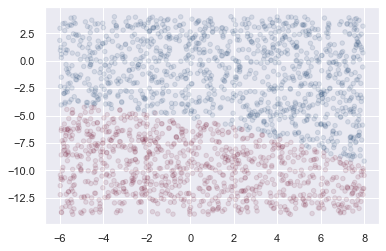

In [17]:
# Visualisasikan hasil prediksi
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)

Gabungkan visualisasi untuk mendapatkan gambaran tentang kelas pada data training dan data test.

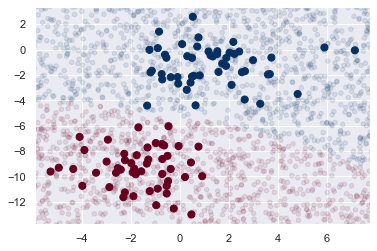

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Perlihatkan probabilitas beberapa data di data test.

In [19]:
yprob = nb_model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### 2.2 Contoh 2

Implementasi Gaussian Naive Bayes pada dataset Iris.

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Kita dapat membagi jumlah data training dan data testing dengan mengimplementasikan kelas `train_test_split` pada modul `sklearn.model_selection`. Nilai proporsi data training dan data testing dapat dilakukan dengan memasukkan parameter `test_size` dengan rentang nilai 0 s/d 1.

In [21]:
X, y = load_iris(return_X_y=True)

# Proporsi data training sebesar 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [22]:
nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)
print('Akurasi model: {}'.format(nb_model.score(X_test, y_test)))

Akurasi model: 0.9333333333333333
